# Lecture 21 - supplementary
- Norms of Vectors
- Distances
- Angles

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Norm of Vectors

In [2]:
def plotvec(*argv):
    colors=['b','k','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

## Euclidean Norm

<div class="alert alert-info">
  <strong>Euclidean Norm</strong>

The **Euclidean norm** of an $n$-vector $\mathbf{x}$, denoted $\Vert \mathbf{x}\Vert$, is the square-root of the inner product of the vector with itself, i.e. 

\begin{align*}
\Vert\mathbf{x}\Vert = \sqrt{\mathbf{x}^T\mathbf{x}} = \sqrt{x_1^2+x_2^2+\cdots+x_n^2}=\left(x_1^2+x_2^2+\cdots+x_n^2\right)^{1/2}
\end{align*}
</div>

The Euclidean norm of the vector $\mathbf{x}$ is sometimes written with a subscript 2, as $\Vert\mathbf{x}\Vert_2$. (The subscript 2 indicates that the entries of $\mathbf{x}$ are raised to the second power.)

The Euclidean norm of the vector is also known as the **L2-norm**.

Things we can do with Euclidean norm (or L2-norm):
* Compute *length* of a vector: $\text{length}(\mathbf{x}) = \Vert\mathbf{x}\Vert = \sqrt{x_1^2 + \cdots+x_n^2}$
* Compute *distance* between vectors: $d(\mathbf{x},\mathbf{y}) = \Vert\mathbf{x}-\mathbf{y}\Vert$
* Relate inner products to norm, **Cauchy-Schwarz inequality**: $|\mathbf{x}^T\mathbf{y}|\leq \Vert\mathbf{x}\Vert \Vert\mathbf{y}\Vert$ 

**Properties of Norm.** Let $\mathbf{x}$ and $\mathbf{y}$ be two vectors and $\beta$ a scalar

1. Nonnegative Homogeneity: $\Vert \beta\mathbf{x}\Vert = |\beta|\times\Vert\mathbf{x}\Vert$

2. Nonnegativity: $\Vert\mathbf{x}\Vert \geq 0$

3. Definiteness: $\Vert\mathbf{x}\Vert = 0$ only if $\mathbf{x}=\mathbf{0}$

<div class="alert alert-info">
    
**Triangle Inequality**: $\Vert\mathbf{x}+\mathbf{y}\Vert \leq \Vert\mathbf{x}\Vert + \Vert\mathbf{y}\Vert$

</div>

where 
\begin{align*}
\Vert\mathbf{x}+\mathbf{y}\Vert^2 &= (\mathbf{x}+\mathbf{y})^T(\mathbf{x}+\mathbf{y})\\
&= \mathbf{x}^T\mathbf{x} + \mathbf{x}^T\mathbf{y} + \mathbf{y}^T\mathbf{x}+\mathbf{y}^T\mathbf{y}\\
&= \Vert\mathbf{x}\Vert^2 + 2\mathbf{x}^T\mathbf{y} + \Vert\mathbf{y}\Vert^2
\end{align*}

Let's understand this property (**Triangle Inequality**) better using the virtual whiteboard.

# Distances

## Euclidean Distance

<div class="alert alert-info">
  <strong>Euclidean Distance</strong>

We already know how to compute **Euclidean distance** between vectors, $\mathbf{x}$ and $\mathbf{y}$, in an Euclidean geometry:

$$d(\mathbf{x},\mathbf{y}) = \Vert\mathbf{x}-\mathbf{y}\Vert$$

The Euclidean distance corresponds to the shortest line that connects the two vectors $\mathbf{x}$ and $\mathbf{y}$.
</div>

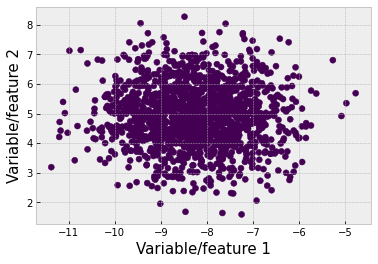

In [3]:
from sklearn.datasets import make_blobs

n_samples = 1500
X, T = make_blobs(n_samples=n_samples,centers=1,cluster_std=1)

plt.scatter(X[:,0],X[:,1],c=T)
plt.xlabel('Variable/feature 1',size=15)
plt.ylabel('Variable/feature 2',size=15);

In [4]:
X.shape # NxD

(1500, 2)

In [5]:
mu = np.mean(X, axis=0)

mu

array([-8.26901522,  4.94757234])

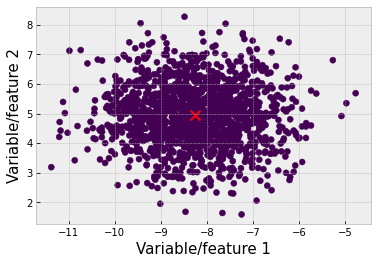

In [6]:
plt.scatter(X[:,0],X[:,1],c=T)
plt.scatter(mu[0],mu[1],s=100,marker='x',c='r')
plt.xlabel('Variable/feature 1',size=15)
plt.ylabel('Variable/feature 2',size=15);

In [7]:
X[0,:] - mu

array([-0.6721042 ,  1.17276898])

In [9]:
# euclidean distance between the first sample and the mean
np.sqrt(np.sum((X[0,:] - mu)**2))

1.3517067542671104

In [10]:
X - mu

array([[-0.6721042 ,  1.17276898],
       [-0.37863589, -1.98451559],
       [ 0.00260459, -0.28653816],
       ...,
       [-2.06812809, -0.48654278],
       [-0.10885856,  0.56076306],
       [-1.16558745, -0.19023004]])

In [14]:
# Nx1 distance vector, one for each sample
distances = np.sqrt(np.sum((X - mu)**2, axis=1))

distances.shape

(1500,)

In [15]:
distances

array([1.35170675, 2.02031366, 0.28655   , ..., 2.12458882, 0.57123147,
       1.18100871])

In [16]:
from scipy.spatial.distance import cdist

In [18]:
?cdist

In [19]:
cdist(X,mu)

ValueError: XB must be a 2-dimensional array.

In [20]:
mu.shape

(2,)

In [21]:
mu[np.newaxis].shape

(1, 2)

In [22]:
cdist(X,mu[np.newaxis])

array([[1.35170675],
       [2.02031366],
       [0.28655   ],
       ...,
       [2.12458882],
       [0.57123147],
       [1.18100871]])

## Mahalanobis Distance

Suppose you have data that looks like this:

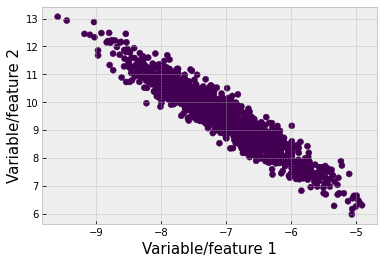

In [23]:
X = np.dot(X, [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]) 

plt.scatter(X[:,0],X[:,1],c=T)
plt.xlabel('Variable/feature 1',size=15)
plt.ylabel('Variable/feature 2',size=15);

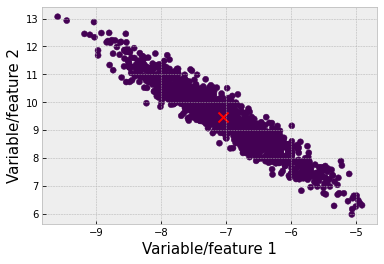

In [24]:
mu = np.mean(X, axis=0)

plt.scatter(X[:,0],X[:,1],c=T)
plt.scatter(mu[0],mu[1],s=100,marker='x',c='r')
plt.xlabel('Variable/feature 1',size=15)
plt.ylabel('Variable/feature 2',size=15);

We could use the information that the variables are linearly dependent, but using the covariance matrix!

<div class="alert alert-info">
  <strong>Mahalanobis Distance</strong>

The **Mahalanobis distance** between vectors, $\mathbf{x}$ and $\mathbf{y}$ is defined as:

$$d(\mathbf{x},\mathbf{y}) = \sqrt{(\mathbf{x}-\mathbf{y})^T\mathbf{K}^{-1}(\mathbf{x}-\mathbf{y})}$$

where $K=\operatorname{cov}(\mathbf{x},\mathbf{y})$, and $K^{-1}$ is the inverse of the covariance matrix. **We will define inverse of matrices later**.
</div>

In [26]:
Mdist = cdist(X, mu[np.newaxis], metric='mahalanobis')

Mdist

array([[1.30593429],
       [1.967803  ],
       [0.27726316],
       ...,
       [2.1452191 ],
       [0.5508525 ],
       [1.19174529]])

In [27]:
Edist = cdist(X, mu[np.newaxis], metric='euclidean')

Edist

array([[1.68156537],
       [1.56283896],
       [0.27310643],
       ...,
       [1.3911795 ],
       [0.62204882],
       [0.85723235]])

## Angle between Vectors

The angle between two nonzero vectors $\mathbf{x}$ and $\mathbf{y}$ is defined as

$$\theta = \angle(\mathbf{x},\mathbf{y}) = \arccos\left(\frac{\mathbf{x}^T\mathbf{y}}{\Vert\mathbf{x}\Vert \Vert\mathbf{y}\Vert}\right)$$

where $\arccos$ denotes the inverse cosine, normalized to lie in the interval $[0,\pi]$. (The default angle unit is radians; $360^{\circ}$ is $2\pi$ radians.)

In other words, we define $\theta$ as the unique number between $0$ and $\pi$ that satisfies

$$\mathbf{x}^T\mathbf{y} = \Vert\mathbf{x}\Vert \Vert\mathbf{y}\Vert\cos \theta$$

<div class="alert alert-info">
  <strong>Cosine Distance</strong>

The **cosine distance** between vectors, $\mathbf{x}$ and $\mathbf{y}$ is defined as:

$$d(\mathbf{x},\mathbf{y}) = 1 - \cos(\theta) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\Vert\mathbf{x}\Vert\Vert\mathbf{y}\Vert}$$
    
where $\theta=\angle(\mathbf{x},\mathbf{y})$ is the angle between $\mathbf{x}$ and $\mathbf{y}$. 
    
* If the two vectors have a small angle between them, the cosine of that angle will be close to 1, then they are said to be **similar**. Therefore their difference will approach 0.
</div>

* The angle is a **symmetric**: $\angle(\mathbf{x},\mathbf{y}) = \angle(\mathbf{y},\mathbf{x})$. 

* The angle is not affected by scaling each of the vectors by a positive scalar: $\angle(\alpha\mathbf{x},\beta\mathbf{y}) = \angle(\mathbf{x},\mathbf{y})$

For example, the the angle between the vectors $\mathbf{x} = [1,2,1]^T$ and $\mathbf{y}=[2,0,3]^T$ is

$$\arccos\left(\frac{5}{\sqrt{6}\sqrt{13}}\right) \simeq \arccos(0.5661) \simeq 0.9689 \simeq 55.52^{\circ}$$

* If the angle is $\pi/2 = 90^{\circ}$, i.e., $\mathbf{\overrightarrow{x}}^T\mathbf{\overrightarrow{y}}=0$, the vectors are said to be **orthogonal**.

We write $\mathbf{\overrightarrow{x}}\perp \mathbf{\overrightarrow{y}}$ if $\mathbf{\overrightarrow{x}}$ and $\mathbf{\overrightarrow{y}}$ are orthogonal.

* If the angle is zero, which means $\mathbf{\overrightarrow{x}}^T\mathbf{\overrightarrow{y}} = \Vert\mathbf{\overrightarrow{x}}\Vert \Vert\mathbf{\overrightarrow{y}}\Vert$, the vectors are **aligned**. Each vector is a positive multiple of the other.

* If the angle is $\pi=180^{\circ}$, which means $\mathbf{\overrightarrow{x}}^T\mathbf{\overrightarrow{y}} = -\Vert\mathbf{\overrightarrow{x}}\Vert \Vert\mathbf{\overrightarrow{y}}\Vert$, the vectors are **anti-aligned**. Each vector is a negative multiple of the other.

* If $\angle(\mathbf{\overrightarrow{x}},\mathbf{\overrightarrow{y}}) < \pi/2 = 90^{\circ}$, the vectors are said to make an **acute angle**. This is the same as $\mathbf{\overrightarrow{x}}^T\mathbf{\overrightarrow{y}}>0$, i.e., the vectors have positive inner product.

* If  $\angle(\mathbf{\overrightarrow{x}},\mathbf{\overrightarrow{y}}) > \pi/2 = 90^{\circ}$, the vectors are said to make an **obtuse angle**. This is the same as $\mathbf{\overrightarrow{x}}^T\mathbf{\overrightarrow{y}}<0$, i.e., the vectors have negative inner product.

#### Other Applications of Angles between Vectors

1. We can calculate the "spherical" distances. This type of distance is also commonly referred to as **geodesic distances** (shortest path on a curved surface).
2. Document similarity via angles. If n-vectors $\mathbf{\overrightarrow{x}}$ and $\mathbf{\overrightarrow{y}}$ represent the word counts for two documents, their angle $\angle(\mathbf{\overrightarrow{x}},\mathbf{\overrightarrow{y}})$ can be used as a measure of document dissimilarity. 
3. Clustering.

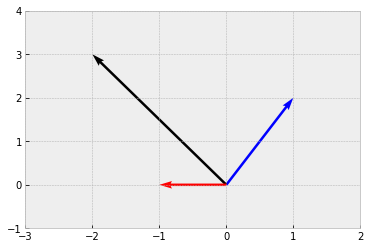

In [28]:
a=np.array([[1,2]])
b=np.array([[-2,3]])
c=np.array([[-1,0]])

plotvec(a[0,:],b[0,:], c[0,:])

In [29]:
print('Euclidean distance:', cdist(a,b))
print('Cosine distance:', cdist(a,b,metric = 'cosine'))

Euclidean distance: [[3.16227766]]
Cosine distance: [[0.50386106]]


In [30]:
print('Euclidean distance:', cdist(a,c))
print('Cosine distance:', cdist(a,c,metric = 'cosine'))

Euclidean distance: [[2.82842712]]
Cosine distance: [[1.4472136]]
